# Tarea 1 Métodos Lineales para regresión
---
## Integrantes: 
- *José Eduardo Caimapo* -  jose.caimapo.12@sansano.usm.cl - 201373573-8
- *Rodrigo Sepúlveda* - rodrigo.sepulveda.12@sansano.usm.cl - 201204766-8

# 1. Regresión lineal ordinaria
En la siguiente sección se centra en estudiar las regresiones lineales ordinarias, para esto se utilizará el conjunto de datos “House Sales in King County, USA”, presentado en la plataforma Kaggle, el cual se compone de 21613 registros de casas vendidas en el condado de King, incluyendo Seattle, entre mayo del 2014 y mayo del 2015, el conjunto de datos incluye información de las casas y su precio. El objetivo de estudiar este conjunto de datos es predecir el valor de una vivienda de acuerdo con sus características.

In [1]:
# Imports 
import pandas               as pd
import matplotlib.pyplot    as plt
import numpy                as np
import sklearn.linear_model as lm

from sklearn.metrics         import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.preprocessing   import StandardScaler

## a) Construya un dataframe con los datos a analizar descargándolos desde la plataforma como se indicó
Se procede a construir un dataframe con los elementos del conjunto de datos, 	además se eliminan las columnas que no aportan información relevante al problema, entre estas el identificador de cada registro, la fecha en que vendió la casa,  el zipcode. Además, se muestran los primeros 5 registros del conjunto de datos. 

In [2]:
df = pd.read_csv("kc_house_data.csv")
df.drop(['id', 'date', 'zipcode',], axis=1, inplace=True) df_scaled
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


## b) Describa brevemente el dataset a utilizar
A continuación, se procede a describir la información del conjunto de datos:

In [3]:
df.shape

(21613, 18)

El conjunto de datos se compone de 21613 filas las cuales corresponden a los registros de la casas vendidas y 18 columnas las cuales corresponden a los distintos atributos o cualidades presentes en el conjunto de datos incluyéndose el precio de cada casa, siendo este la variable a predecir. 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(13)
memory usage: 3.0 MB


De las columnas del conjunto de datos es posible apreciar que ninguna presenta valores faltantes, y cada columna corresponde a:

| Predictor   | Descripción                              |
|:---------   |:--------------------------------------   |
| price       | Precio de la casa, variable a predecir   |
| bedrooms    | Número de habitaciones por casa          |
| bathrooms   | Número de baños por cada habitación      |
| sqft_living | Pies cuadrados de la casa                |
| sqft_lot    | Pies cuadrados del terreno               |
| floors      | Cantidad de pisos en la casa             |
| waterfront  | Si la casa tiene vista a la costa        |
| view        | Si fue vista                                          |
| condition   | Qué tan buena es la condición de la casa (en general) |
| grade | Grado general dado a la unidad de vivienda, basado en el sistema de clasificación del condado de King |
| sqft_above | Metros cuadrados de la casa aparte del sótano |
| sqft_basement | Metros cuadrados del sótano |
| yr_built | Año de construcción | 
| yr_renovated | Año de renovación de la casa |
| lat | Coordenada de Latitud |
| long | Coordenada de Longitud |
| sqft_living15 | Área de la sala de estar en el 2015 |
| sqft_lot15 | Área del lotSize en el 2015 |

In [5]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


De los estadísticos presentados para cada columna, es posible apreciar que todas las columnas poseen un valor diferente, y en distintas magnitudes, para el promedio y la desviación estándar. Además, se observa que cada columna presenta su propia escala, produciendo grandes diferencias entre los distintos atributos. Finalmente es posible apreciar que los atributos que no aplican para cada columna se representan con un cero, es decir si una casa no se ha remodelado el valor para el año de remodelación es 0, y así para cada atributo que no aplique en cada registro. 

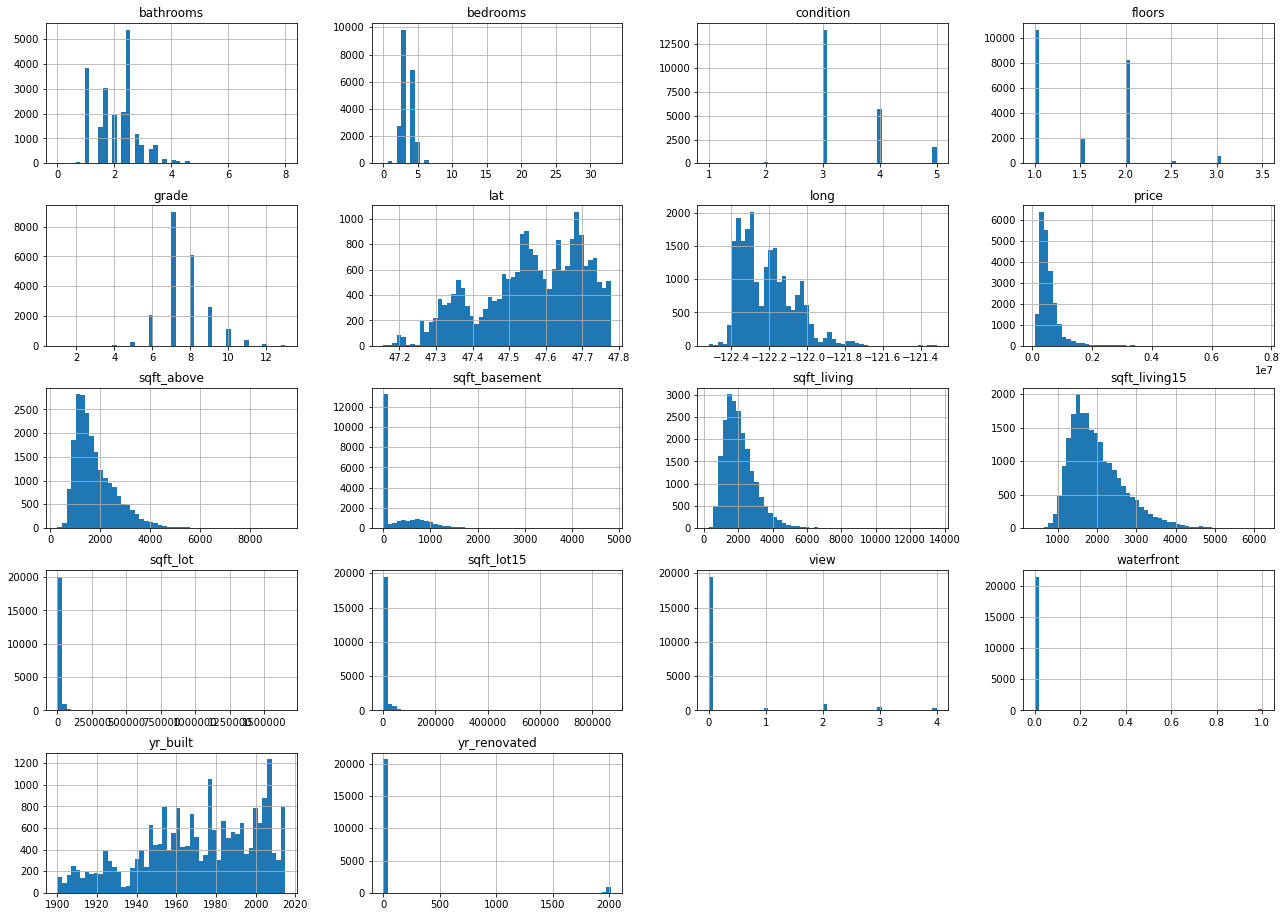

In [6]:
df.hist(bins=50, figsize=(22,16))
plt.show()

## c) Normalice los datos antes de trabajar y aplique una trasformación adecuada a la variable a predecir. Explique la importancia/conveniencia de realizar estas dos operaciones.

Antes de determinar la regresión lineal ordinaria es necesario normalizar los datos, es decir hacer que las características de los datos tengan media cero y varianza unitaria. 

El normalizar o estandarización de los datos es requerimiento común en muchos métodos de aprendizaje automático, en especial de una LSS donde los supuestos consisten en que las características de los datos poseen media cero y varianza unitaria. Si se entrena una LSS con un conjunto de datos no estandarizado/normalizado es de esperar que el resultado obtenido sea malo.  Además, los regularizadores, como el l1 y l2, azumen que las características están centradas en el cero y que las varianzas están en la misma magnitud, si las características poseen varianzas en distintas magnitudes, las de mayor magnitud predominaran en la función objetivo haciendo que el modelo no sea capaz de aprender otras características como se esperaría. 


Finalmente se aplica una trasformación a la variable estudiada para que esta posea un comportamiento lineal y así poder ser estimada correctamente por el modelo a generar.

In [7]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['price'] = np.log(df['price'])
df_scaled.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21613.000000,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04,2.161300e+04
mean,13.047817,-1.254167e-15,-1.051951e-15,3.174253e-16,3.281921e-17,-1.753125e-14,1.482989e-15,1.853096e-15,-2.636807e-15,-2.328998e-15,3.892022e-16,-2.022801e-15,3.592925e-15,4.348961e-15,-3.446807e-14,-3.637898e-14,-1.506632e-16,1.235382e-16
std,0.526685,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,11.225243,-3.624404e+00,-2.745920e+00,-1.948891e+00,-3.521759e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-3.702668e+00,-5.663344e+00,-1.809494e+00,-6.586810e-01,-2.417383e+00,-2.101284e-01,-2.916795e+00,-2.166543e+00,-2.316325e+00,-4.438052e-01
25%,12.682152,-3.987371e-01,-4.736214e-01,-7.108948e-01,-2.430487e-01,-9.154270e-01,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-7.226314e-01,-6.586810e-01,-6.810785e-01,-2.101284e-01,-6.426977e-01,-8.102505e-01,-7.244971e-01,-2.808593e-01
50%,13.017003,-3.987371e-01,1.756067e-01,-1.849914e-01,-1.808075e-01,1.053939e-02,-8.717263e-02,-3.057595e-01,-6.291869e-01,-5.588357e-01,-2.758102e-01,-6.586810e-01,1.360059e-01,-2.101284e-01,8.478232e-02,-1.143518e-01,-2.138280e-01,-1.885636e-01
75%,13.377006,6.764851e-01,5.002207e-01,5.118578e-01,-1.066880e-01,9.365058e-01,-8.717263e-02,-3.057595e-01,9.075535e-01,2.919156e-01,5.091458e-01,6.066704e-01,8.849999e-01,-2.101284e-01,8.512345e-01,6.312541e-01,5.448802e-01,-9.835556e-02
max,15.856731,3.185793e+01,7.641730e+00,1.247807e+01,3.950434e+01,3.714405e+00,1.147149e+01,4.914129e+00,2.444294e+00,4.545672e+00,9.204044e+00,1.023238e+01,1.497813e+00,4.806428e+00,1.570054e+00,6.383070e+00,6.162239e+00,3.144029e+01


Después de normalizar el conjunto de datos, se aprecia que las medias de las características son casi iguales a cero, y las varianzas son casi iguales a uno.

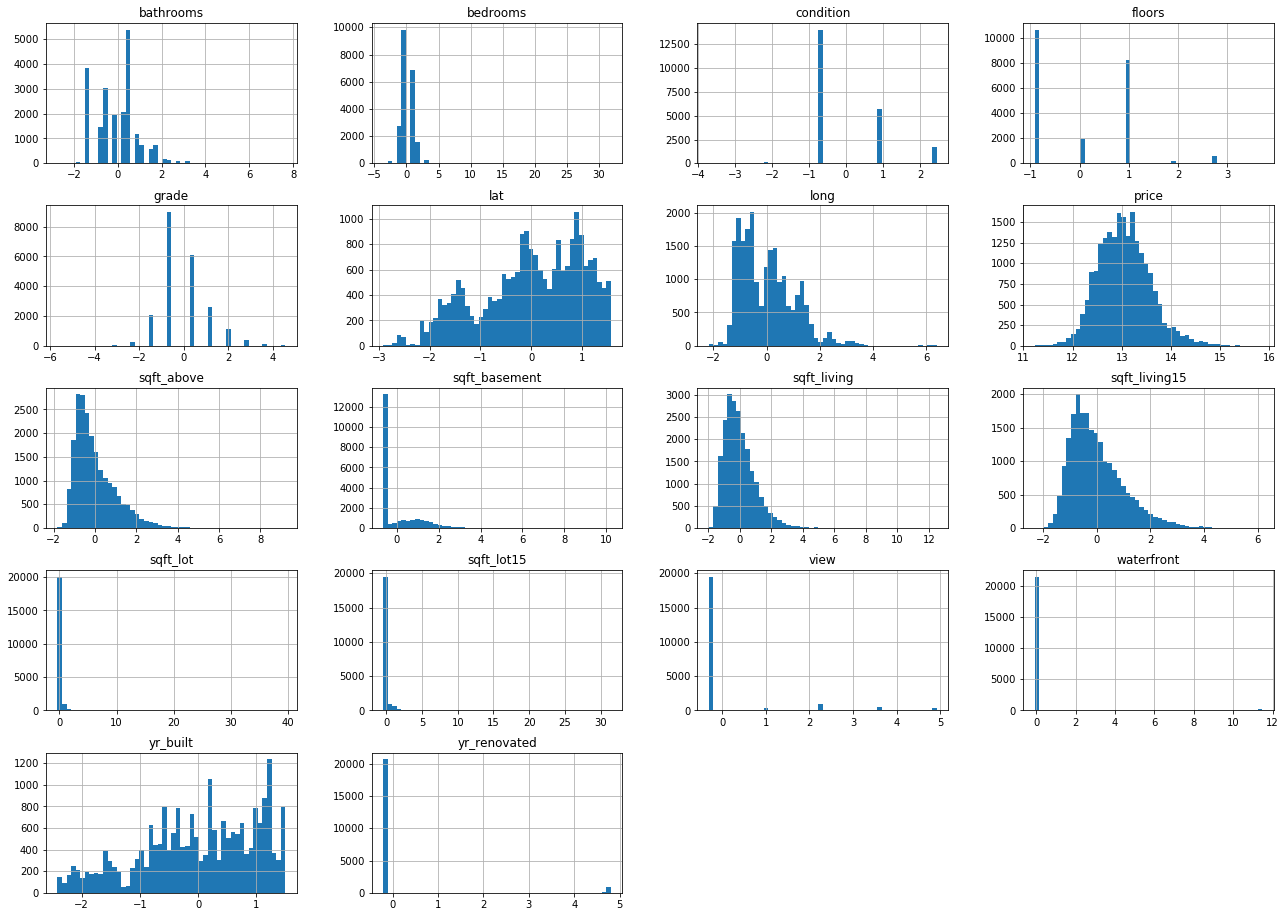

In [8]:
df_scaled.hist(bins=50, figsize=(22,16))
plt.show()

In [9]:
def set_style(axarr, lx, ly, title):
    axarr.set_xlabel(lx)
    axarr.set_ylabel(ly)
    axarr.set_title(title)
    axarr.grid(True)

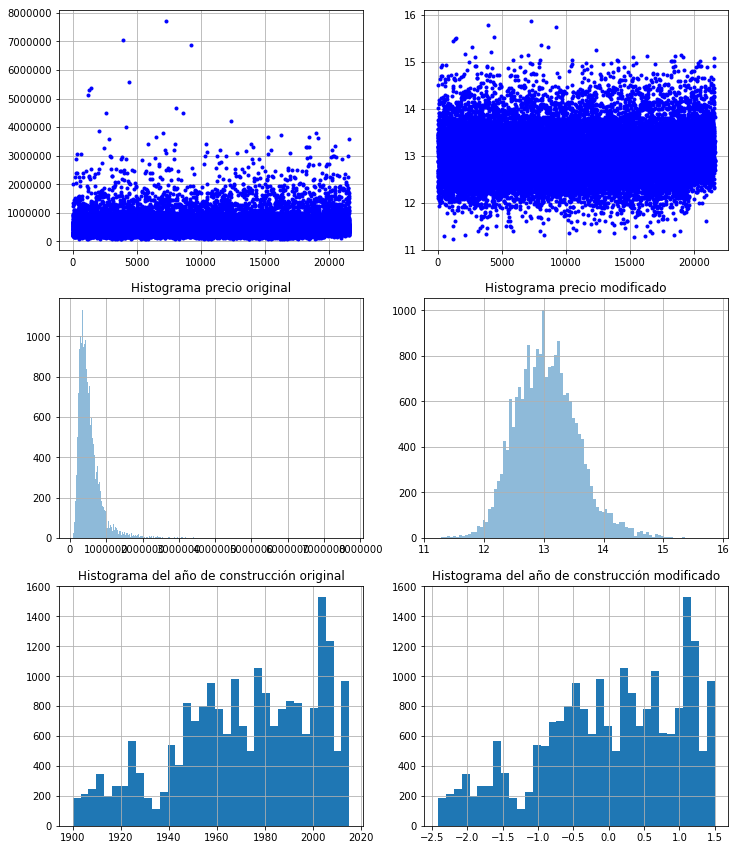

In [10]:
f, axarr = plt.subplots(3, 2,figsize=(12,15))

axarr[0, 0].plot(df['price'], 'b.')
set_style(axarr[0,0], '', '', '')

axarr[0, 1].plot(df_scaled['price'], 'b.')
set_style(axarr[0,1], '', '', '')

axarr[1, 0].hist(df['price'], bins='auto', alpha=0.5)
set_style(axarr[1,0], '', '', 'Histograma precio original')

axarr[1, 1].hist(df_scaled['price'], bins='auto', alpha=0.5)
set_style(axarr[1,1], '', '', 'Histograma precio modificado')

axarr[2, 0].hist(df['yr_built'], bins='auto')
set_style(axarr[2,0], '', '', u'Histograma del año de construcción original')

axarr[2, 1].hist(df_scaled['yr_built'], bins='auto')
set_style(axarr[2,1], '', '', u'Histograma del año de construcción modificado')

plt.show()

De los gráficos del precio antes y después de realizar la normalización se aprecia que la escala del precio se modifica drásticamente a una de menor amplitud donde la distribución de registros presenta una mayor homogeneidad, es decir no se aprecian grandes distancias entre los distintos valores. De los histogramas del año de construcción se aprecia que la normalización de los datos no afecto la distribución original de estos, solo modifico la media y la varianza.

## d) Realice una regresiónlineal de mínimos cuadrados básica. Explique la importancia/conveniencia del paso 4 y los argumentos que se deben entregar a la funcion que implementa la regresión lineal.
Primero se separa el conjunto de datos en la matriz $X$ y el vector de precios $y$

In [11]:
X = df_scaled.iloc[:,1:]
N = X.shape[0]
X.insert(X.shape[1], 'intercept', np.ones(N))
y = df_scaled['price']

El modelo que se desea construir posee la siguiente forma:
$$\hat{y} = \hat\beta \cdot X + \beta_0$$
Lo cual implica determinar el valor de $\hat\beta$ y $\hat\beta_0$, pero este modelo se puede simplificar combinando los valores de $\hat\beta$ y $\hat\beta_0$, resultando el siguiente modelo:
$$\hat{y} = \hat\beta \cdot X$$
Donde la matriz $X$ pose dimensiones $n \times d+1$, y los valores añadidos en $X$ son iguales a 1 debido a la identidad. Este nuevo modelo pose un entrenamiento de menor complejidad en comparación al primer modelo ya que solo es necesario determinar el valor de $\hat\beta$, 

Después se crean los conjuntos de entrenamiento ($X_{train}$) y prueba ($X_{test}$) a partir de los conjuntos originales, para realizar dicha separación se asignaron los primeros 15129 elementos al conjunto de entrenamiento y los restantes al conjunto de pruebas.

In [12]:
mascara = np.zeros(len(X))
limit = int(len(X)*0.7)
mascara[:limit] = 1
istrain = mascara== 1
Xtrain = X[istrain]
ytrain = y[istrain]
Xtest = X[np.logical_not(istrain)]
ytest = y[np.logical_not(istrain)]

Finalmente se crea el modelo de la LSS y se entrena.

In [13]:
linreg = lm.LinearRegression(fit_intercept = False)
linreg.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

Finalmente se evalúa el modelo realizado obteniéndose una precisión igual a 93%

In [14]:
ypred = linreg.predict(Xtest)
print("Mean squared error: %.2f" % mean_squared_error(ytest,ypred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(ytest, ypred))


Mean squared error: 0.07
Variance score: 0.76


## e) Construya una tabla con los pesos y Z-score correspondientes a cada predictor. ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?
Se procede a determinar el z-score para cada predictor, utilizando la siguiente formula:
$$Z_j = \frac{\hat\beta}{\hat\sigma \sqrt{v_j}} $$
Donde $\hat\beta_j$ es el elemento $j$ de los pesos determinados por la regresión, $v_j$ es el elemento  $j$ de la diagonal de $(X^TX)^{-1}$, y $\hat\sigma$ es la varianza calculada con la siguiente formula:
$$ \hat\sigma^2 = \frac{ \sum\limits^N_{i=1} \left( y_i - \hat y_i \right)^2 } {N} $$

In [15]:
Xm = Xtrain.as_matrix()
vj = np.diag(np.linalg.inv(Xm.T.dot(Xm)))
beta_est = linreg.coef_
sigma_est = np.sqrt(np.mean( (ypred - ytest)**2))

SEM = (sigma_est*np.sqrt(vj))
Zscore = beta_est/SEM

data = {
    'Beta'      : pd.Series(beta_est, index = X.columns.values),
    'std error' : pd.Series(SEM,      index = X.columns.values),
    'Z-Score'   : pd.Series(Zscore,   index = X.columns.values)
}

pd.DataFrame(data)

C:\Users\tres1\Anaconda3\envs\py27\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


,Beta,Z-Score,std error
bedrooms,-0.008270,-3.018656,0.002740
bathrooms,0.055960,14.581522,0.003838
sqft_living,0.057769,NaN,NaN
sqft_lot,0.022159,7.558868,0.002932
floors,0.037595,12.207513,0.003080
waterfront,0.033526,14.710529,0.002279
view,0.042082,17.302296,0.002432
condition,0.045277,20.432416,0.002216
grade,0.186212,47.823832,0.003894
sqft_above,0.047130,NaN,NaN


Al observar los resultados del Z-score obtenidos se aprecia la existencia de valores NaN (Not a Number) los cuales son provocados por la presencia de valores negativos en la diagonal de la matriz $(X^TX)^{-1}$. 

*Explicación de por qué esto pasa*

## f) Propornga un método para corregir lo observado. Verifíquelo mediante los Z-score presentados en la pregunta anterior.

Para corregir lo obtenido se propone la identificación de los vectores dependientes, dejando de lado estos del dataset

In [16]:
X_filtro = X.drop(['sqft_living'], axis=1, inplace=False)
#y = df_scaled['price']
Xtrain2 = X_filtro[istrain]
#ytrain2 = y[istrain]
Xtest2 = X_filtro[np.logical_not(istrain)]
#ytest2 = y[np.logical_not(istrain)]

In [17]:
linreg2 = lm.LinearRegression(fit_intercept = False)
linreg2.fit(Xtrain2, ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False)

In [18]:
Xm2 = Xtrain2.as_matrix()
vj2 = np.diag(np.linalg.inv(Xm2.T.dot(Xm2)))
beta_est2 = linreg2.coef_
ypred2 = linreg2.predict(Xtest2)
sigma_est2 = np.sqrt(np.mean( (ypred2 - ytest)**2))

SEM2 = (sigma_est2*np.sqrt(vj2))
Zscore2 = beta_est2/SEM2

data = {
    'Beta'      : pd.Series(beta_est2, index = X_filtro.columns.values),
    'std error' : pd.Series(SEM2,      index = X_filtro.columns.values),
    'Z-Score'   : pd.Series(Zscore2,   index = X_filtro.columns.values)
}

pd.DataFrame(data)

,Beta,Z-Score,std error
bedrooms,-0.008270,-3.018656,0.002740
bathrooms,0.055960,14.581522,0.003838
sqft_lot,0.022159,7.558868,0.002932
floors,0.037595,12.207513,0.003080
waterfront,0.033526,14.710529,0.002279
view,0.042082,17.302296,0.002432
condition,0.045277,20.432416,0.002216
grade,0.186212,47.823832,0.003894
sqft_above,0.099216,20.978081,0.004730
sqft_basement,0.059536,20.561632,0.002896


## g) Estime el error de predicción usando validación cruzada con un número de *folds* igual a $K=5$ y $K=10$

## (h) Mida los errores de prediccion para cada dato de entrenamiento. Utilizando un \quantile-quantile plot" determine si es razonable la hipotesis de normalidad sobre los residuos del modelo.

# 2. Selección de Atributos
Para continuar el estudio de las regresiones lineales ordinarias, se utilizara el mismo conjunto de datos utilizado en la pregunta 1, pero ahora se estudiara el comportamiento de los modelos generados en función de la cantidad de parámetros a utilizar para construir la regresión.
## a) Construya una función que implemente Forward Step-wise Selection (FSS). Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo.  
La implementación propuesta consiste utilizar el algoritmo Forward Step-wise Selection como base, el cual corresponde a un algotirmo Greedy, y transformarlo en un algoritmo del tipo Greedy randomized adaptive search procedure o por sus siglas GRASP. Los algoritmos del tipo GRASP corresponden a una metaheurística, la cual enfoca la mayor parte del esfuerzo a construir soluciones de alta calidad que son posteriormente procesadas con el fin de conseguir otras aún mejores. Un GRASP generalmente se compone de 3 etapas principales las cuales son, Preprocesamiento, Fase Constructiva, Postprocesamiento, y su estructura básica es:

```
Prodedure GRASP
    Init
    While (Criterio de parada no satisfecho):
        Preprocesamiento
        Fase Constructiva
        Postprocesamiento
        Actualizar mejor Solución
    EndWhile
EndProdedure
```
En específico para el problema de selección de atributos mediante FSS en una regresión lineal, las etapas del GRASP consisten en:
- Preprocesamiento: principalmente en esta etapa se determinan las regresiones lineales, cuando se calcula una regresión lineal se guardan los resultandos obtenidos en una lista de historial, con el objetivo de poder utilizar la información generara en un futuro y poder disminuir la cantidad de regresiones a determinar.
- Construcción: esta etapa se centra en la elección de las características, utilizando la información del preprocesamiento se elige una característica aleatoria entre las $n$ características que ayudan a minimizar el MSE de entrenamiento. 
- Postprocesamiento: Esta etapa consiste en la mejora de la solución construida en la etapa de Construcción, generalmente utilizando algún algoritmo de búsqueda local, pero para la adaptación del FSS a GRASP se determinó que esta etapa sería muy costosa en relación al aporte generado. 

El algoritmo resultante es:

```
Prodedure FSS_GRASP
    calculados = Nueva lista
    While (Criterio de parada no satisfecho):
        restantes = lista de candidatos
        seleccionados = Nueva lista
        While (remaining and len(seleccionados)<=k) :
            candidados = Nueva lista
            For candidato in restantes:
                index = seleccionados + candidato
                If (index in calculados):
                    mse_train = calculados[index][mse_train]
                    mse_test = calculados[index][mse_test]
                Else:
                    Calcular reg
                    mse_train = reg[mse]
                    mse_test = reg[mse_test]
                    guardar mse_candidate y mse_test en calculados
                guargar (index, mse_train, mse_test) en candidatos
            elegir un candidato aleatorio entre los mejores n candidatos.
            anañadir candidato a los seleccionados y eliminarlo de los restantes
        If calidad(seleccionados) > calidad(mejor_seleccionado):
            actualizar mejor seleccionado
    EndWhile
    Return mejor_selecionado
EndProdedure
```

A continuación, se definen las funciones a utilizar:

In [19]:
def get_mse_cantidate_KFold(Xm, ym):
    kf = KFold(n_splits=5)
    mse_train = 0
    mse_val = 0
    for train, val in kf.split(Xm):
        model = lm.LinearRegression(fit_intercept=False)
        model.fit(Xm[train], ym[train])
        yhat_train = model.predict(Xm[train])
        yhat_val = model.predict(Xm[val])
        mse_train += mean_squared_error(ym[train], yhat_train)
        mse_val += mean_squared_error(ym[val], yhat_val)
    mse_train /= 5
    mse_val /= 5
    return (mse_train, mse_val)

In [36]:
def get_mse_cantidate(Xm, ym, Xt, yt):
    model = lm.LinearRegression(fit_intercept=False)
    model.fit(Xm, ym)
    yhat_train = model.predict(Xm)
    yhat_val = model.predict(Xt)
    mse_train = mean_squared_error(ym, yhat_train)
    mse_val = mean_squared_error(yt, yhat_val)
    return (mse_train, mse_val)

In [42]:
def fss(x, y, names_x, xt, yt,  k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    mse_iteration = []
    mse_iteration_test = []
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            mse_candidate, mse_test = get_mse_cantidate(x_train, y, xt[:,indexes], yt)
            score_candidates.append((mse_candidate, candidate, mse_test))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate, best_mse_test = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        mse_iteration.append(best_new_score)
        mse_iteration_test.append(best_mse_test)
    solution = {
        'selected': selected,
        'mse_iteration': mse_iteration,
        'mse_iteration_test': mse_iteration_test,
        'mse': mse_iteration[-1]
    }
    return solution

In [52]:
def grasp_fss(x, y, names_x, xt, yt, k=10000, n_try=10, seed=0, len_lsm=3):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    np.random.seed(seed)
    best_mse = 1000; best_index = 0
    pre_data = {}
    pre_test = {}
    solutions = []
    for i in xrange(n_try):
        print 'epoch %d\r'%i , 
        remaining = range(0, p)
        selected = [p]
        current_score = best_new_score = 0.0
        mse_iteration = []
        mse_iteration_test = []
        while remaining and len(selected)<=k :
            score_candidates = []
            for candidate in remaining:
                indexes = selected + [candidate]
                if str(indexes) in pre_data.keys():
                    mse_candidate = pre_data[str(indexes)]
                    mse_test = pre_test[str(indexes)]
                else:
                    x_train = x[:,indexes]
                    mse_candidate, mse_test = get_mse_cantidate(x_train, y, xt[:,indexes], yt)
                    pre_data[str(indexes)] = mse_candidate 
                    pre_test[str(indexes)] = mse_test 
                score_candidates.append((mse_candidate, candidate, mse_test))
            score_candidates.sort()
            score_candidates[:] = score_candidates[::-1]
            score_index = len(score_candidates)-1-np.random.randint(min(len_lsm, len(score_candidates)))
            best_new_score, best_candidate, best_mse_test = score_candidates[score_index]
            remaining.remove(best_candidate)
            selected.append(best_candidate)
            mse_iteration.append(best_new_score)
            mse_iteration_test.append(best_mse_test)
        current_solution = {
            'selected': selected,
            'mse_iteration': mse_iteration,
            'mse_iteration_test': mse_iteration_test,
            'mse': mse_iteration[-1]
        }
        solutions.append(current_solution)
        if best_mse > current_solution['mse']:
            best_mse = current_solution['mse']
            best_index = i
    return (solutions, best_index)

Se determinan los resultados de FSS y GRASP FSS:

In [72]:
names_regressors = X_filtro.columns[:-1] #without intercept
Xm = Xtrain2.as_matrix()
ym = ytrain.as_matrix()
Xt = Xtest2.as_matrix()
yt = ytest.as_matrix()
seleccionados = fss(Xm, ym, names_regressors, Xt, yt)

In [40]:
a,b = grasp_fss(Xm, ym, names_regressors, Xt, yt, n_try = 50)

epoch 0 epoch 1 epoch 2 epoch 3 epoch 4 epoch 5 epoch 6 epoch 7 epoch 8 epoch 9 epoch 10 epoch 11 epoch 12 epoch 13 epoch 14 epoch 15 epoch 16 epoch 17 epoch 18 epoch 19 epoch 20 epoch 21 epoch 22 epoch 23 epoch 24 epoch 25 epoch 26 epoch 27 epoch 28 epoch 29 epoch 30 epoch 31 epoch 32 epoch 33 epoch 34 epoch 35 epoch 36 epoch 37 epoch 38 epoch 39 epoch 40 epoch 41 epoch 42 epoch 43 epoch 44 epoch 45 epoch 46 epoch 47 epoch 48 epoch 49


Se grafican los resultados obtenidos para los errores de entrenamiento y testeo en función de la cantidad de predictores para el FSS y cada solución creada del GRASP.

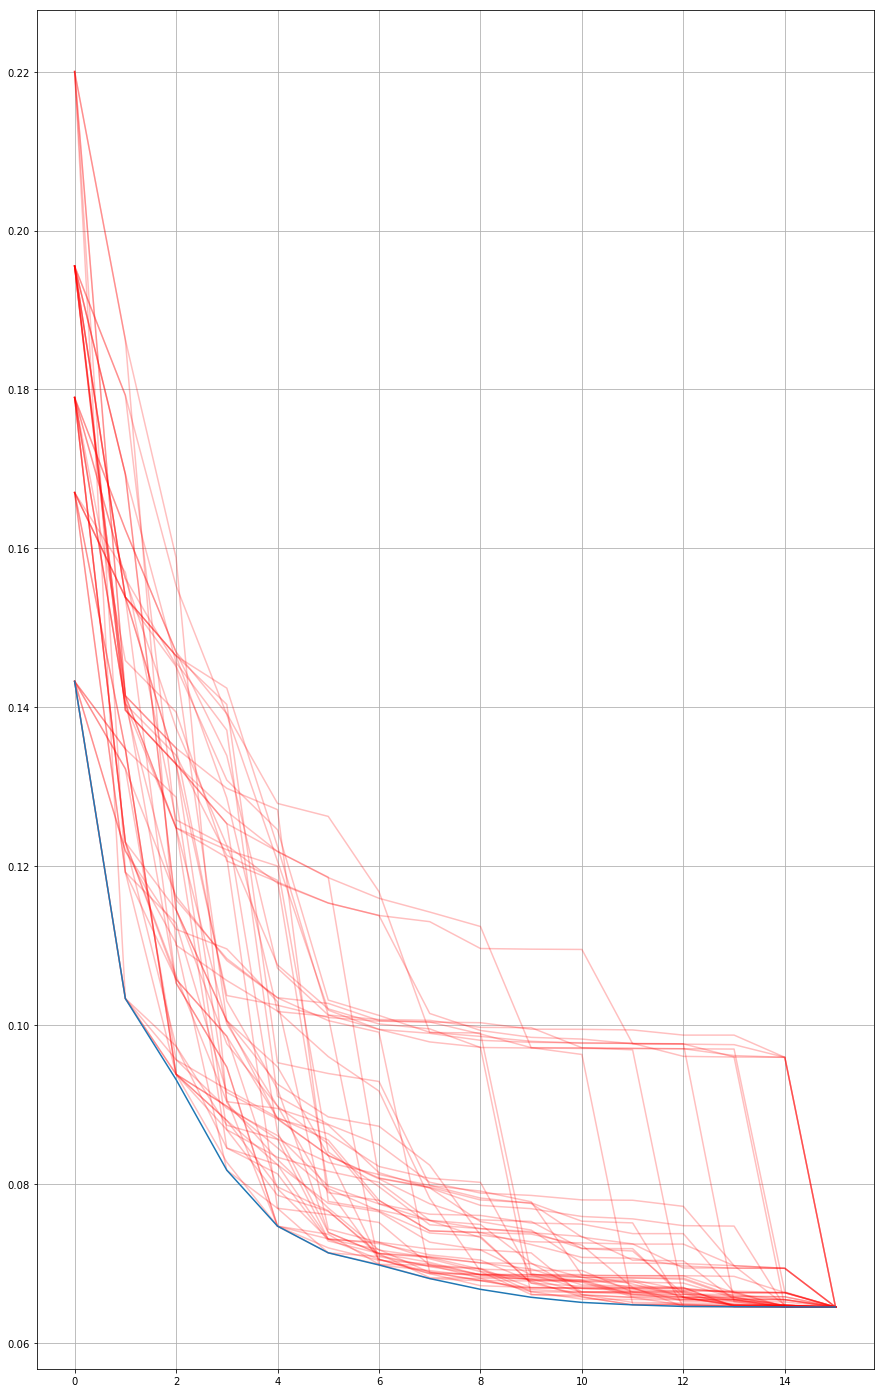

In [47]:
plt.figure(1,figsize=(15,25))
for i in xrange(len(a)):
    plt.plot(a[i]['mse_iteration'], color='r', alpha=0.25)
plt.plot(seleccionados['mse_iteration'])
plt.grid(True)
plt.show()

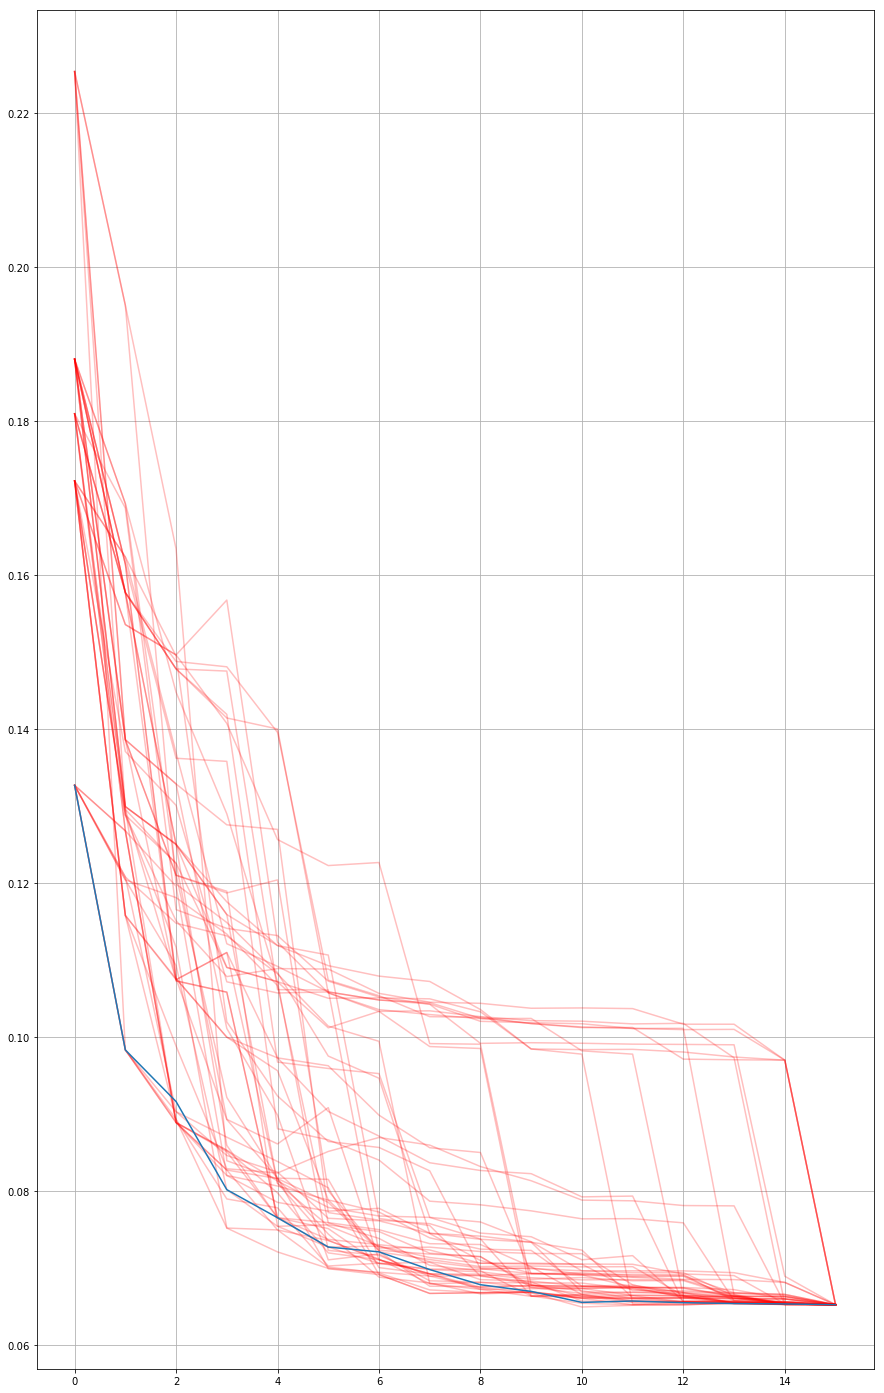

In [48]:
plt.figure(1,figsize=(15,25))
for i in xrange(len(a)):
    plt.plot(a[i]['mse_iteration_test'], color='r', alpha=0.25)
plt.plot(seleccionados['mse_iteration_test'])
plt.grid(True)
plt.show()

De los gráficos generados se aprecia que ninguna solución generada en el GRASP mejora el MSE de entrenamiento del algoritmo original, pero al analizar los resultados de los gráficos del error de testeo se aprecia que algunas de las soluciones generadas en el GRASP son capases de mejorar el MSE de testeo, indicando que existenten y se encontraron combinaciones de predictores capases de describir el dataset de mejor manera que la combinación obtenida con FSS, en específico para la máscara utilizada para separar los conjuntos de entrenamiento y pruebas se observa que con 7 predictores la regresión obtiene resultados similares a los de FSS con 10 predictores.

Para estudiar en mayor profundidad la propuesta realizada se propone crear una nueva separación de los conjuntos de entrenamiento, ya que la selección por una máscara fija puede estar sesgando la selección del dataset influenciando el entrenamiento y prueba del modelo creado. Y para determinar si existe influencia o no del dataset se grafican los resultados obtenidos al utilizar el algoritmo FSS en ambos conjuntos de datos. 

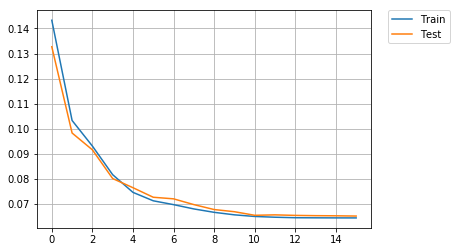

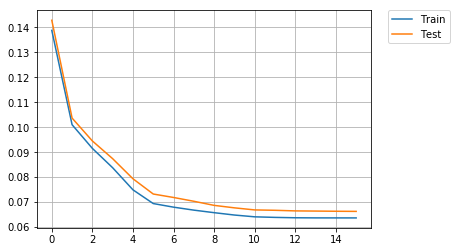

In [75]:
plt.plot(seleccionados['mse_iteration'], label='Train')
plt.plot(seleccionados['mse_iteration_test'], label='Test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()


plt.plot(seleccionados2['mse_iteration'], label='Train')
plt.plot(seleccionados2['mse_iteration_test'], label='Test')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid(True)
plt.show()

De los gráficos de los MSE de entrenamiento y testeo sobre los dos conjuntos se aprecia que en el conjunto creado con la máscara los resultados obtenidos son similares, y que en la separación obtenida aleatoriamente los valores de MSE para el entrenamiento y testeo son diferentes y el entrenamiento es menor. Lo anterior indica que la utilización de la máscara está generando un conjunto de pruebas de mayor facilidad en comparación al de entrenamiento, lo cual puede influenciar en la decisión de si el modelo es correcto o no.

A continuación se procede a evaluar los resultados de GRASP FSS variando la cantidad del largo la lista de mejores candidatos en 3, 5, 7, y se grafican sus resultados de entrenamiento.

In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filtro, y, test_size=0.3, random_state=42)

Xm2 = X_train.as_matrix()
ym2 = y_train.as_matrix()
Xt2 = X_test.as_matrix()
yt2 = y_test.as_matrix()

- Largo lista igual a 3

In [74]:
seleccionados2 = fss(Xm2, ym2, names_regressors, Xt2, yt2)
a,b = grasp_fss(Xm2, ym2, names_regressors, Xt2, yt2, n_try = 100)

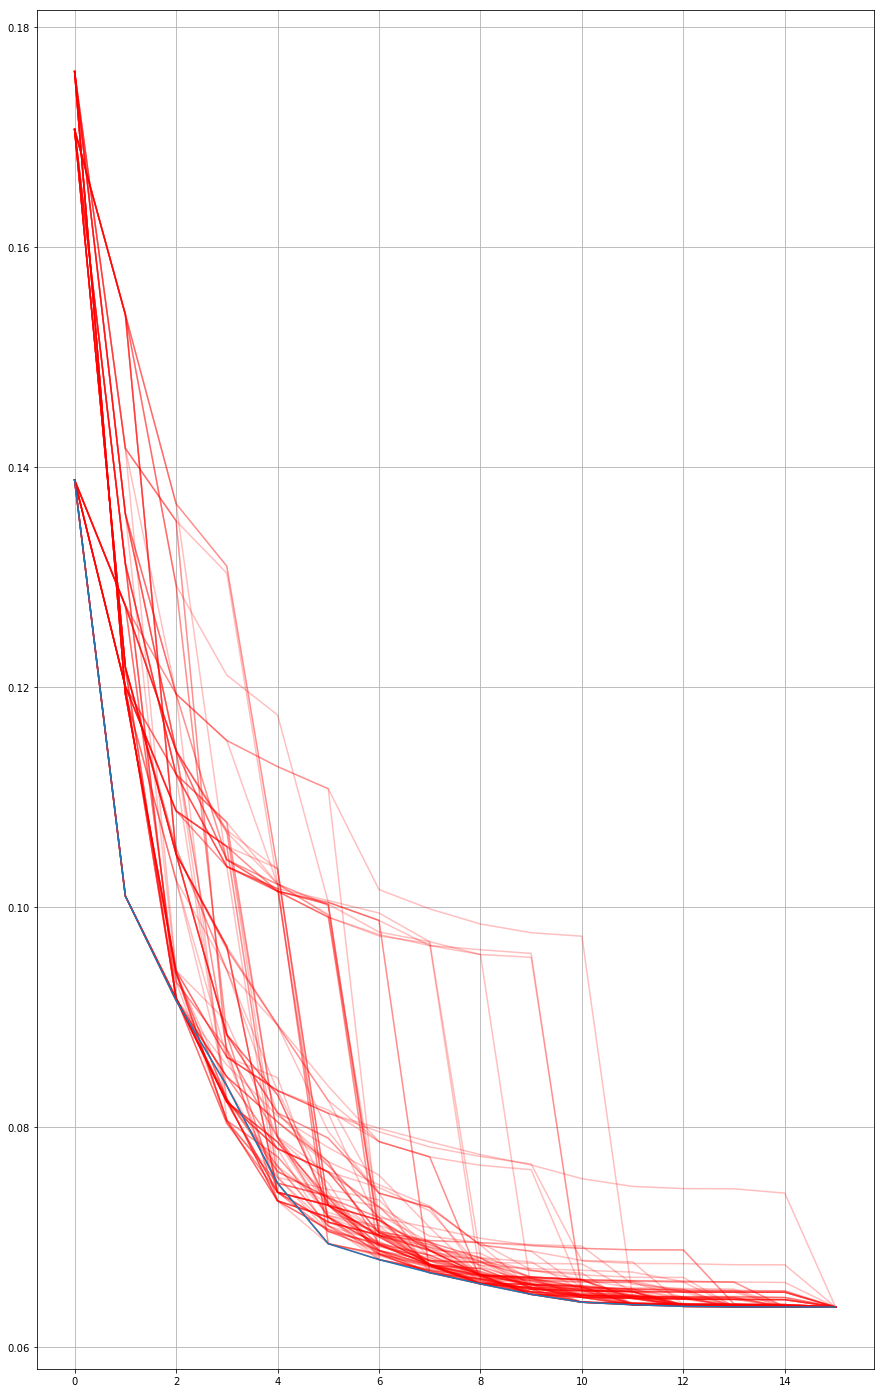

In [68]:
plt.figure(1,figsize=(15,25))
for i in xrange(len(a)):
    plt.plot(a[i]['mse_iteration'], color='r', alpha=0.25)
plt.plot(seleccionados['mse_iteration'])
plt.grid(True)
plt.show()

- Largo lista igual a 7

In [62]:
seleccionados = fss(Xm2, ym2, names_regressors, Xt2, yt2)
a,b = grasp_fss(Xm2, ym2, names_regressors, Xt2, yt2, n_try = 100, len_lsm=7)

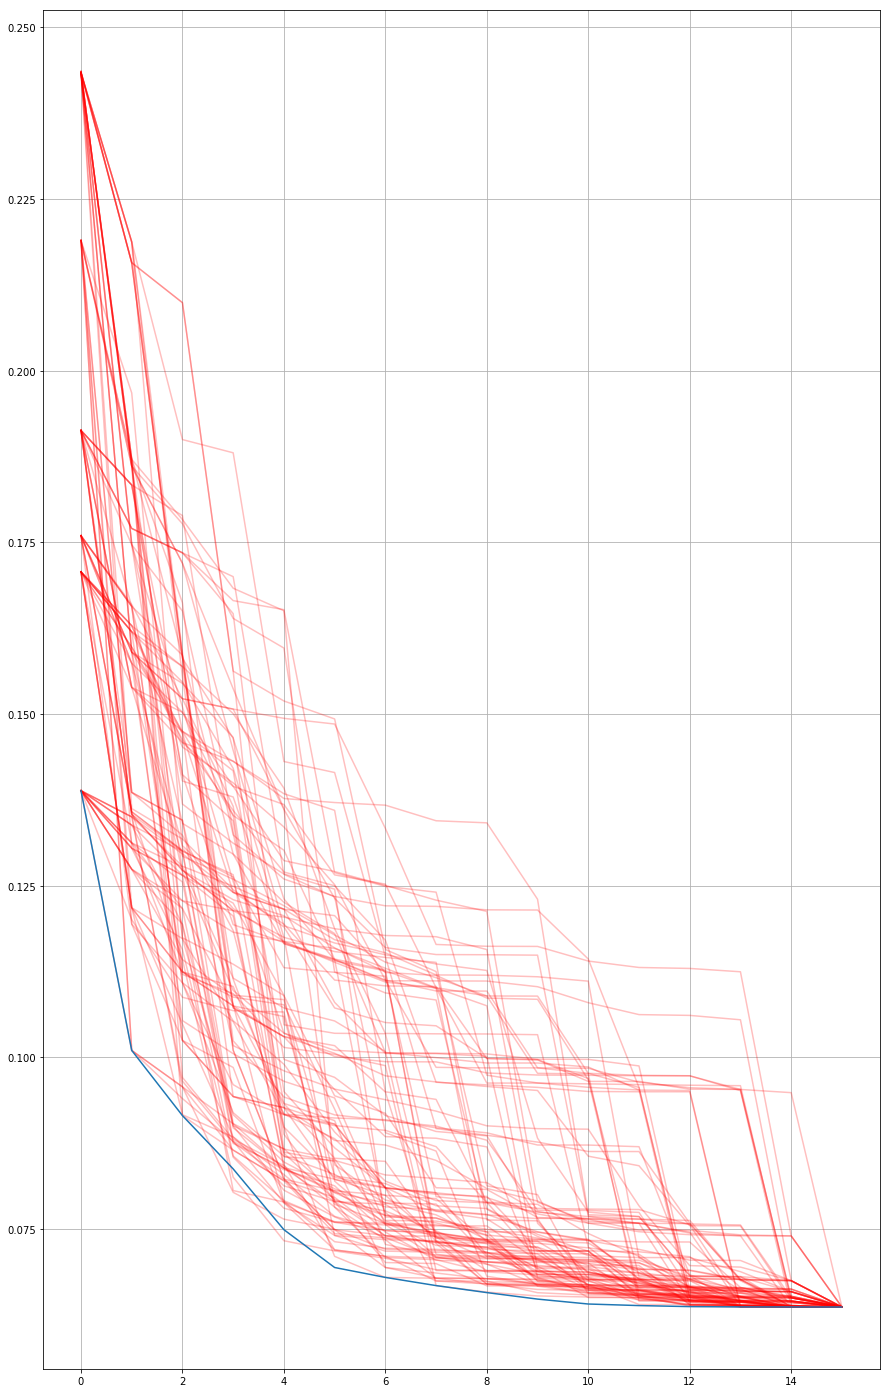

In [63]:
plt.figure(1,figsize=(15,25))
for i in xrange(len(a)):
    plt.plot(a[i]['mse_iteration'], color='r', alpha=0.25)
plt.plot(seleccionados['mse_iteration'])
plt.grid(True)
plt.show()

- Largo lista igual a 5

In [64]:
seleccionados = fss(Xm2, ym2, names_regressors, Xt2, yt2)
a,b = grasp_fss(Xm2, ym2, names_regressors, Xt2, yt2, n_try = 100, len_lsm=5)

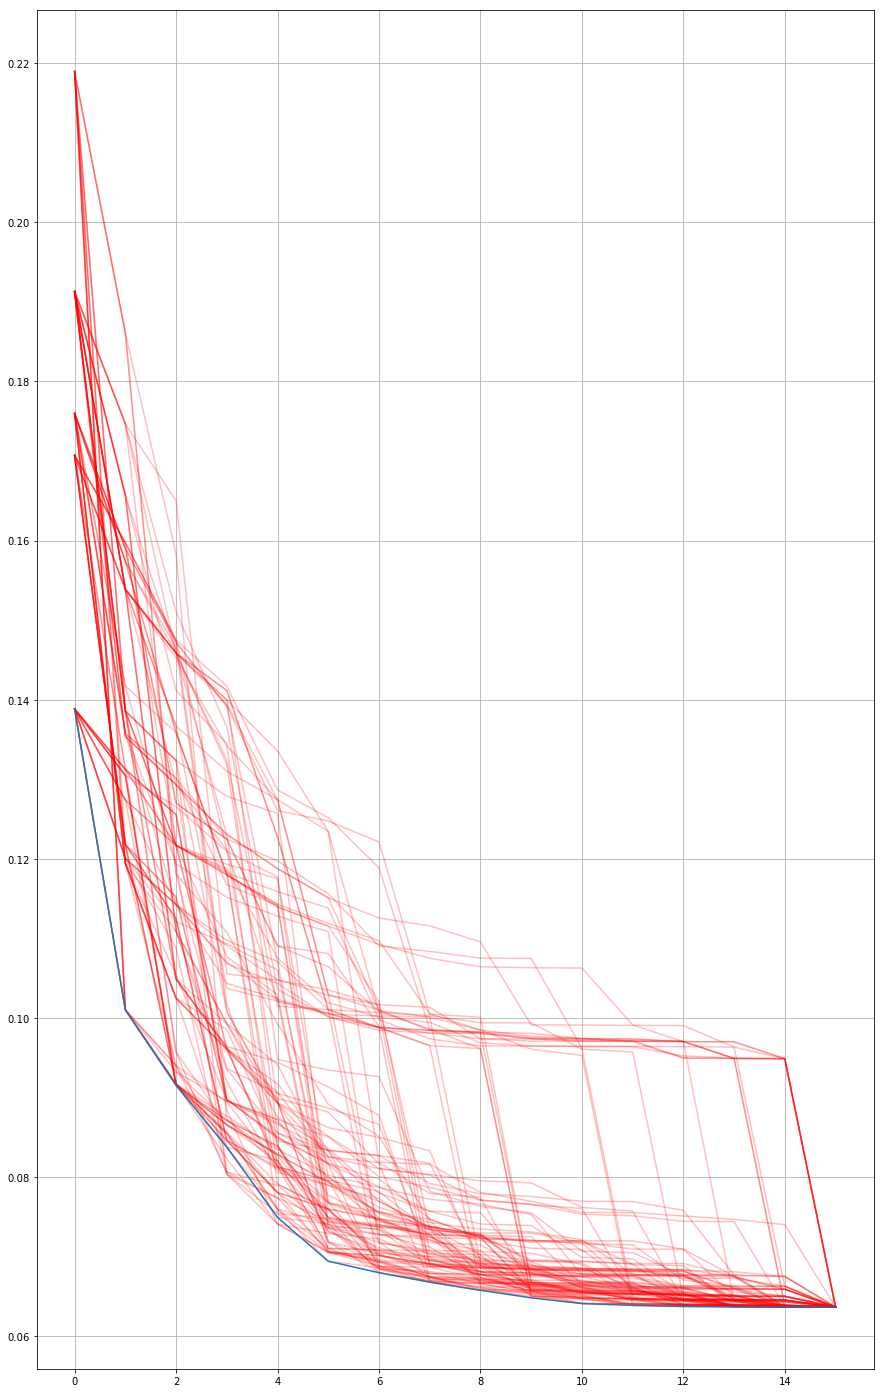

In [65]:
plt.figure(1,figsize=(15,25))
for i in xrange(len(a)):
    plt.plot(a[i]['mse_iteration'], color='r', alpha=0.25)
plt.plot(seleccionados['mse_iteration'])
plt.grid(True)
plt.show()

Gráfico del error de testeo para el largo de la lista 5

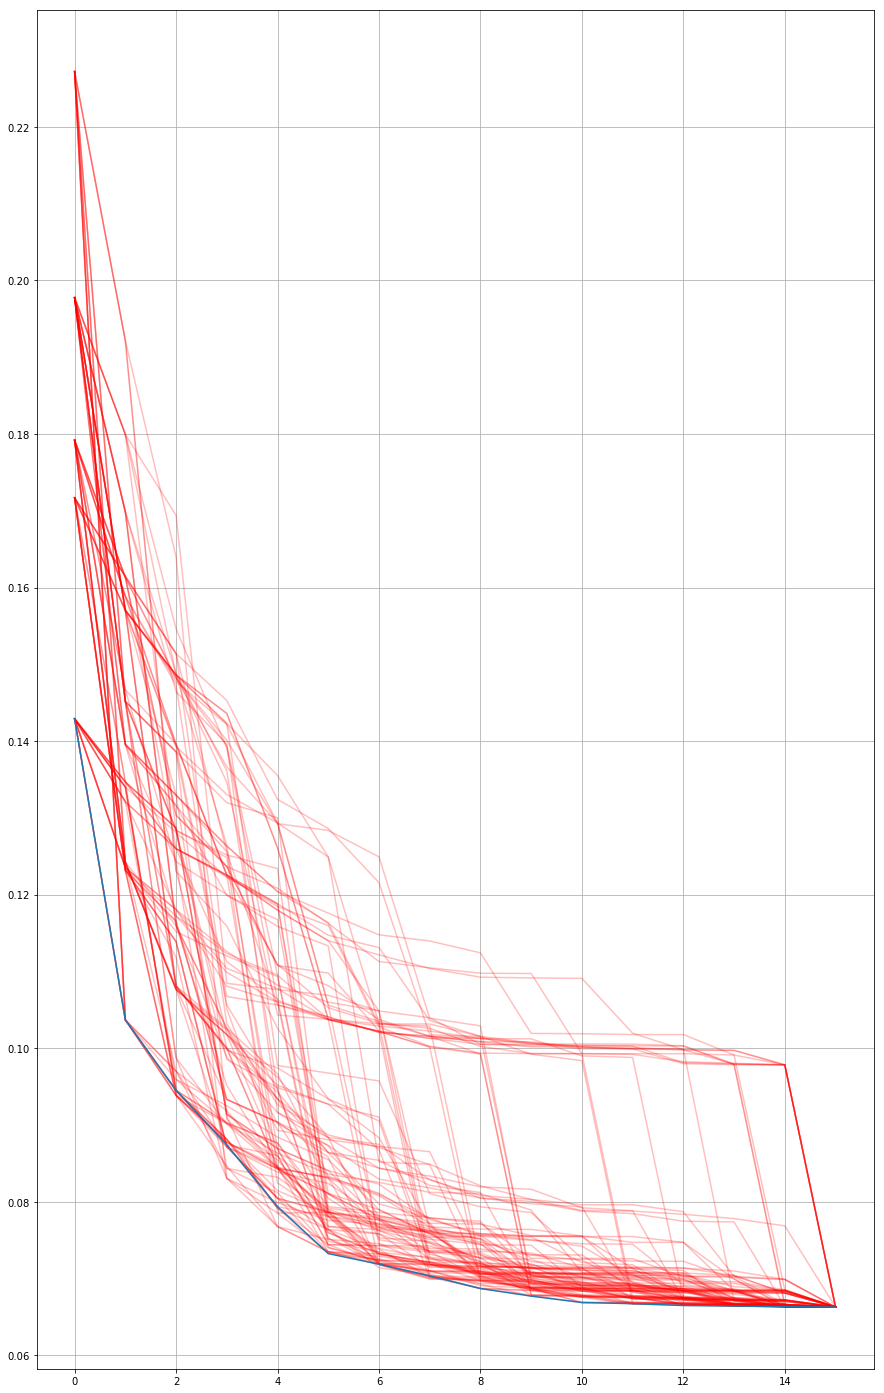

In [66]:
plt.figure(1,figsize=(15,25))
for i in xrange(len(a)):
    plt.plot(a[i]['mse_iteration_test'], color='r', alpha=0.25)
plt.plot(seleccionados['mse_iteration_test'])
plt.grid(True)
plt.show()

De los gráficos anteriores es posible apreciar que GRASP FSS es capaz de obtener mejores combinaciones en comparación a FSS, tanto en el conjunto de entrenamiento y pruebas, y se observa que el mejor largo para la lista de mejores candidatos es igual a 5 ya que con este valor se observa una correcta exploración del espacio de búsqueda.

## 3. Regularización

## 4. Drift

## 5. Detectar enfermedades cardíacas